In [1]:
import ehc_sn as ehc
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# ! python -m scripts.run-mace --map="example" --output_file="ex_trajectories"

In [3]:
trajectories = np.load("data/ex_trajectories.npy", allow_pickle=True)
trajectories.shape

(10,)

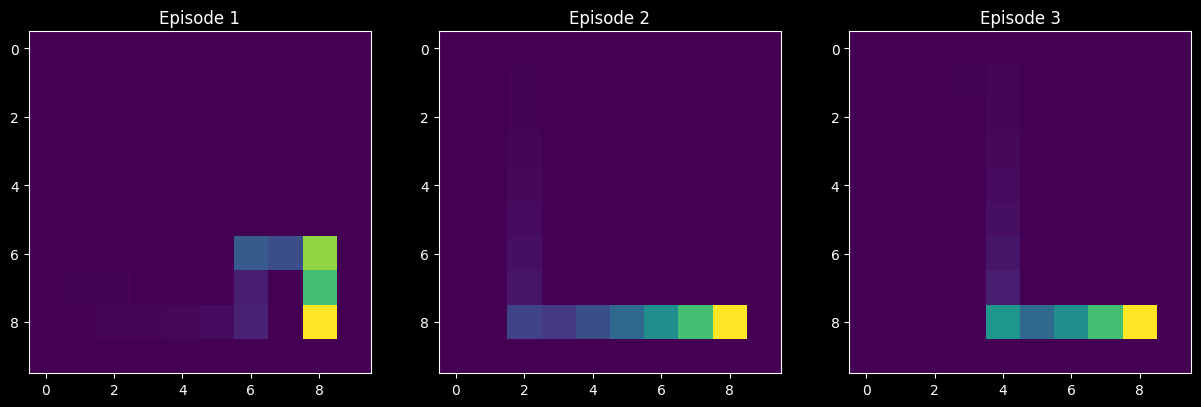

In [4]:
plt.figure(figsize=(15, 5))
n_tr = min(3, len(trajectories))
for n, X in enumerate(trajectories[:n_tr]):
    plt.subplot(1, n_tr, n + 1)
    y = ehc.sequence(X, δ=0.7)
    plt.imshow(y.T, cmap="viridis")
    plt.title(f"Episode {n+1}")
plt.show()

In [9]:
settings = ehc.HGMSettings(δ=0.7, τ=0.9, c=0.4)
model = ehc.HierarchicalGenerativeModel([0.5, 0.5], 100, settings)

In [10]:
episodes = [e.reshape(e.shape[0], -1) for e in trajectories]
p_maps = ehc.learning(model, episodes, γ=0.1, λ=0.1)

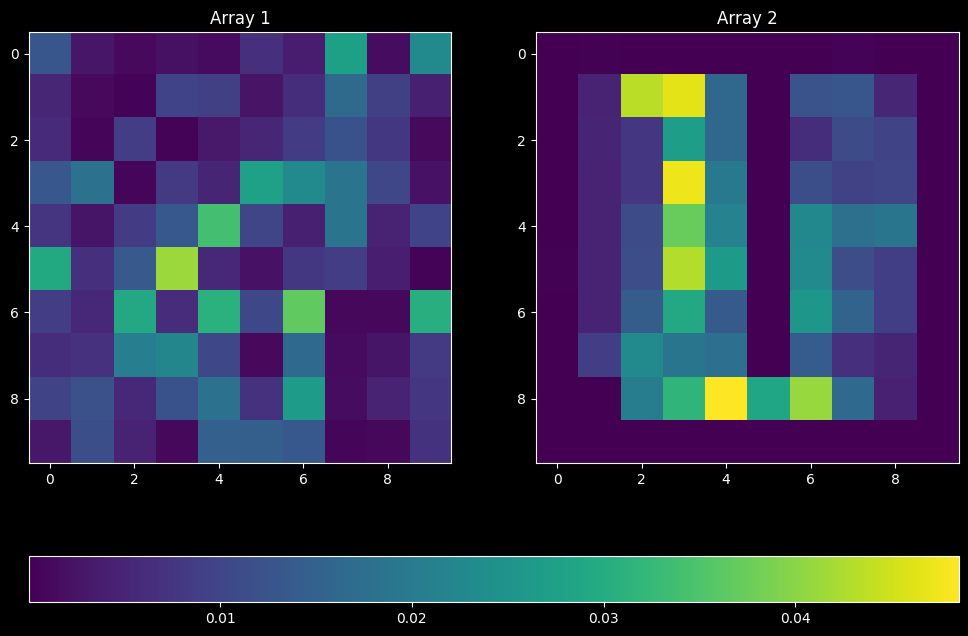

In [11]:
Θ = model.sample_maps()
map_1 = Θ[0].reshape(10, 10).T
map_2 = Θ[1].reshape(10, 10).T

plot_style = dict(
    cmap="viridis",
    aspect="auto",
    vmin=np.nanmin([map_1, map_2]),
    vmax=np.nanmax([map_1, map_2]),
)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
cax1 = ax1.imshow(map_1, **plot_style)
cax2 = ax2.imshow(map_2, **plot_style)

fig.colorbar(cax1, ax=[ax1, ax2], orientation="horizontal")
ax1.set_title("Array 1"), ax2.set_title("Array 2")
plt.show()

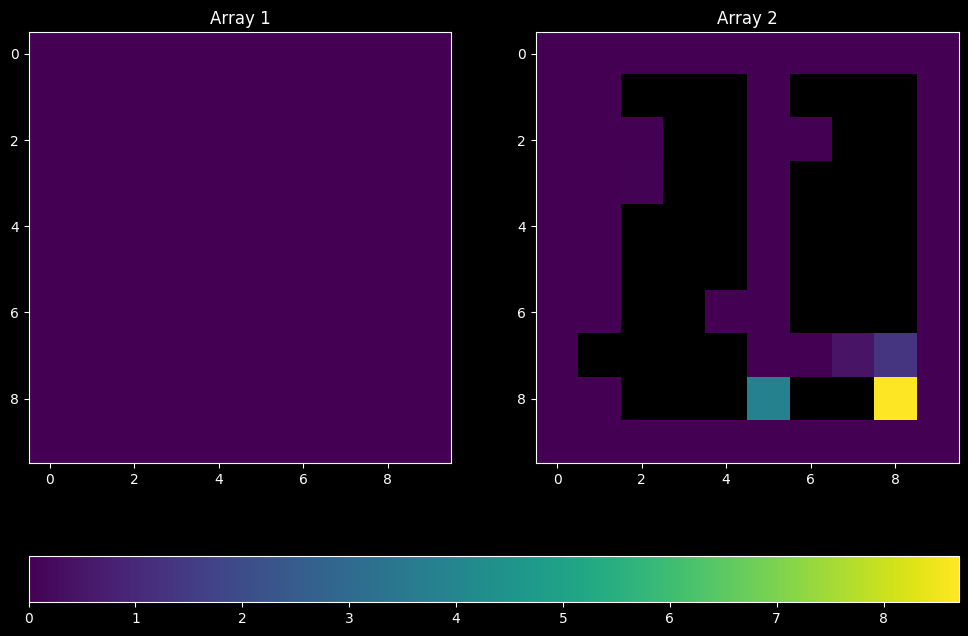

In [12]:
map_1 = p_maps[0].reshape(10, 10).T
map_2 = p_maps[1].reshape(10, 10).T

plot_style = dict(
    cmap="viridis",
    aspect="auto",
    vmin=np.nanmin([map_1, map_2]),
    vmax=np.nanmax([map_1, map_2]),
)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
cax1 = ax1.imshow(map_1, **plot_style)
cax2 = ax2.imshow(map_2, **plot_style)

fig.colorbar(cax1, ax=[ax1, ax2], orientation="horizontal")
ax1.set_title("Array 1"), ax2.set_title("Array 2")
plt.show()